In [1]:
# Задание 1
import pandas as pd 
import numpy as np
import seaborn as sns
df1 = pd.read_excel(r'C:\Users\ibrag\OneDrive\Рабочий стол/Final.xlsx', header=3, usecols="B:H", nrows=20)
df2 = pd.read_excel(r'C:\Users\ibrag\OneDrive\Рабочий стол/Final.xlsx', header=3, usecols="J:L", nrows=20)
# df1
# df2

In [2]:
df1 = df1.set_index('Client code').combine_first(df2.set_index('Client code.1')).reset_index()
df1 = df1.rename(columns={"index": "Client code"})
# df1.drop('City', axis='columns', inplace=True)
# df1.drop('Client Category', axis='columns', inplace=True)
df1 = df1[['Client code','Jan','Feb','Mar','Apr','Client Category.1','City.1',]]
df1.rename(columns={"City.1": "City", "Client Category.1": "Client Category"}, inplace = True)
#df1
dfUnsorted = df1.reindex([0,5,4,11,1,17,16,13,14,2,3,9,10,8,19,15,18,12,7,6])
dfUnsorted = dfUnsorted.rename(index={5: 1,4: 2,11: 3,1: 4,17: 5,16: 6,13: 7,14: 8,
                           2: 9,3: 10,9: 11,10: 12,8: 13,19: 14,15: 15,
                           18: 16,12: 17,7: 18,6: 19,})

# dfSorted = df1.reindex([0,11,13,14,15,16,17,18,19,1,2,3,4,5,6,7,8,9,10,12])
# dfSorted = dfSorted.rename(index={0: 0,11: 1,13: 2,14: 3,15: 4,16: 5,17: 6,18: 7,
#                            19: 8,1: 9,2: 10,3: 11,4: 12,5: 13,6: 14,
#                            7: 15,8: 16,9: 17,10: 18,12: 19,})
# display(dfSorted)

# df = pd.concat([df1, df1], axis=1, keys=('AAPL','DELL'))
# df

dfUnsorted = pd.concat([dfUnsorted[['Client code']], 
                dfUnsorted[['Jan','Feb', 'Mar','Apr']],
                dfUnsorted[['Client Category','City']]], axis=1, keys=('Table1','Sales Volume',''))
display(dfUnsorted)

Table1 Sales Volume                                           
   Client code          Jan   Feb  Mar  Apr Client Category       City
0     Client 1          120   800  150  250               A     Almaty
1    Client 14          300  1500  150  100               D  Karaganda
2    Client 13           90    40  200   60               B   Shymkent
3     Client 2            0  1500   30   40               D  Karaganda
4    Client 10          150   200  200  100               C     Atyrau
5     Client 7            0   300  400  500               D     Atyrau
6     Client 6          250   500  100    0               B     Astana
7     Client 3          240  1300  150  350               B     Astana
8     Client 4           20  3000   50   30               A  Karaganda
9    Client 11          150   200  200  100               A   Shymkent
10   Client 12           35   500   50  750               A     Astana
11   Client 18           30     0  300   50               B     Almaty
12   Client 19           20   100   20   10               C   Pavlodar
13   Client 17           20    80   20   80               D  Karaganda
14    Client 9           60  1000  200   60               C     Astana
15    Client 5            0   200  100  100               C     Almaty
16    Client 8          100   300   50    0               B  Karaganda
17   Client 20          100   500   50  100               B   Pavlodar
18   Client 16           30   250   30    0               B   Shymkent
19   Client 15          200   500   60  250               C   Pavlodar

In [3]:
# Задание 2 создание таблицы где я суммирую все элементы 
# массива собраные по классам клиентов для того чтобы были данные для дальнейшего кода.
df3 = pd.DataFrame([[k,v.values]
                        for k,v in df1.groupby('Client Category').groups.items()], 
                      columns=['Client Category','indices'])
# df3.groupby(['DISTRICT']).size().reset_index(name='counts')

In [4]:

# Вывожу длинну массива для того чтобы понять сколько клинтов относятнся к этому классу 
A = len(df3.iloc[0]['indices'])
B = len(df3.iloc[1]['indices'])
C = len(df3.iloc[2]['indices'])
D = len(df3.iloc[3]['indices'])

In [5]:
# суммирую каждого каждый месяц по уникальному значение А,B,C,D и передаю их в DataFrame
ASumJan = df1.loc[df1['Client Category'] == 'A', 'Jan'].sum()
ASumFeb = df1.loc[df1['Client Category'] == 'A', 'Feb'].sum()
ASumMar = df1.loc[df1['Client Category'] == 'A', 'Mar'].sum()
ASumApr = df1.loc[df1['Client Category'] == 'A', 'Apr'].sum()

BSumJan = df1.loc[df1['Client Category'] == 'B', 'Jan'].sum()
BSumFeb = df1.loc[df1['Client Category'] == 'B', 'Feb'].sum()
BSumMar = df1.loc[df1['Client Category'] == 'B', 'Mar'].sum()
BSumApr = df1.loc[df1['Client Category'] == 'B', 'Apr'].sum()

CSumJan = df1.loc[df1['Client Category'] == 'C', 'Jan'].sum()
CSumFeb = df1.loc[df1['Client Category'] == 'C', 'Feb'].sum()
CSumMar = df1.loc[df1['Client Category'] == 'C', 'Mar'].sum()
CSumApr = df1.loc[df1['Client Category'] == 'C', 'Apr'].sum()

DSumJan = df1.loc[df1['Client Category'] == 'D', 'Jan'].sum()
DSumFeb = df1.loc[df1['Client Category'] == 'D', 'Feb'].sum()
DSumMar = df1.loc[df1['Client Category'] == 'D', 'Mar'].sum()
DSumApr = df1.loc[df1['Client Category'] == 'D', 'Apr'].sum()



In [9]:
df1.groupby('Client Category').sum()

,Jan,Feb,Mar,Apr
Client Category,,,,
A,325,4500,450,1130
B,840,2890,880,560
C,430,2000,580,520
D,320,3380,600,720


In [11]:
df1.groupby(df1['Client Category']).sum()

,Jan,Feb,Mar,Apr
Client Category,,,,
A,325,4500,450,1130
B,840,2890,880,560
C,430,2000,580,520
D,320,3380,600,720


In [12]:
df1['Client Category']

0     A
1     C
2     A
3     A
4     B
5     D
6     C
7     B
8     D
9     B
10    C
11    D
12    B
13    B
14    A
15    C
16    B
17    D
18    B
19    C
Name: Client Category, dtype: object

In [149]:
# Задание 2 создаю DataFrame конец
dataTable2 = [['A',ASumJan,ASumFeb,ASumMar,ASumApr,A], 
              ['B',BSumJan,BSumFeb,BSumMar,BSumApr,B], 
              ['C',CSumJan,CSumFeb,CSumMar,CSumApr,C], 
              ['D',DSumJan,DSumFeb,DSumMar,DSumApr,D]]  
table2 = pd.DataFrame(dataTable2,columns = ['Client Category','Jan','Feb','Mar','Apr','Number of Clients'])
table2
table2Show = pd.concat([table2[['Client Category']], 
                table2[['Jan','Feb', 'Mar','Apr']],
                table2[['Number of Clients']]], axis=1, keys=('Table2','Sales Volume',''))
table2Show

Table2 Sales Volume                                   
  Client Category          Jan   Feb  Mar   Apr Number of Clients
0               A          325  4500  450  1130                 4
1               B          840  2890  880   560                 7
2               C          430  2000  580   520                 5
3               D          320  3380  600   720                 4

In [150]:
# Задание 2
# Таблица для графика
table2exper = pd.DataFrame({'A':[ASumJan,ASumFeb,ASumMar,ASumApr],
                         'B':[BSumJan,BSumFeb,BSumMar,BSumApr],
                   'C':[CSumJan,CSumFeb,CSumMar,CSumApr],
                   'D':[DSumJan,DSumFeb,DSumMar,DSumApr]}, index=['Jan','Feb',
                                                        'Mar','Apr'])



Text(0, 0.5, 'Sales Volume')

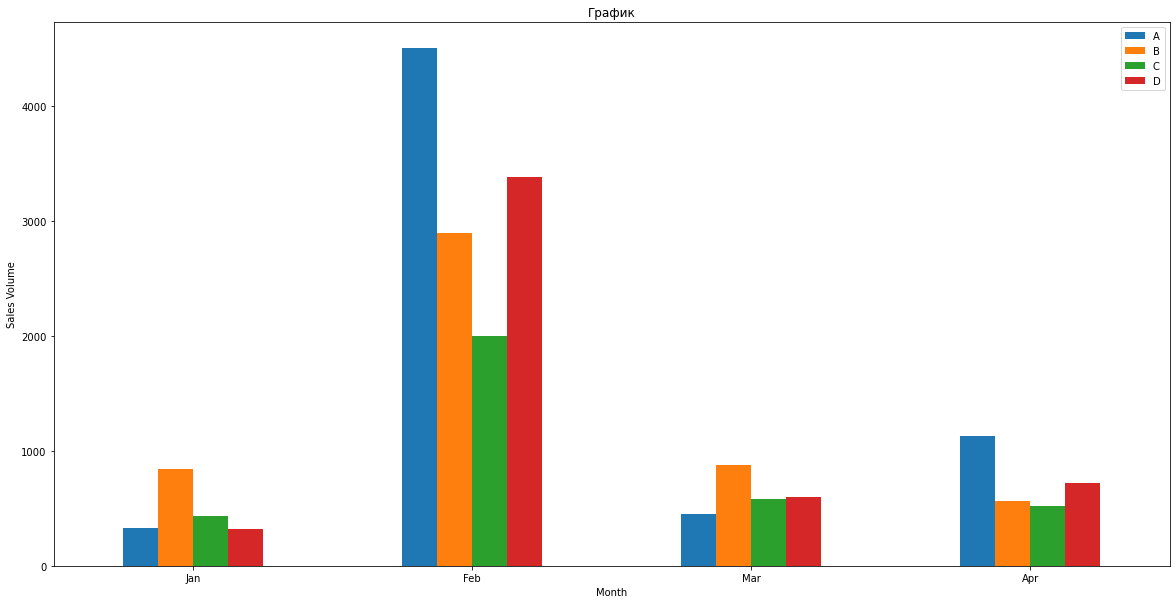

In [151]:
# Задание 2 Создаю BarPlot для продемонтсрирования своего графика
# tabel2 = table2.drop('Number of Clients', axis='columns', inplace=True)
# table2.dropna(subset=['Number of Clients'], inplace=True)
# table2.drop(['Number of Clients'], axis = 1)
# tabel2
ax = table2exper.plot.bar(title = 'График',rot=0,figsize=(20,10))
ax.set_xlabel("Month")
ax.set_ylabel("Sales Volume")

In [152]:
# Задание 3
# Суммирую все значение прохожусь по колонне затем нахожу процент про формуле а * 100/Сумма(колонки)
table2['Jan'].sum()

janA = ("%.2f" % (table2.iloc[0]['Jan']*100/table2['Jan'].sum()))
janB = ("%.2f" % (table2.iloc[1]['Jan']*100/table2['Jan'].sum()))
janC = ("%.2f" % (table2.iloc[2]['Jan']*100/table2['Jan'].sum()))
janD = ("%.2f" % (table2.iloc[3]['Jan']*100/table2['Jan'].sum()))

table2['Feb'].sum()
febA = ("%.2f" % (table2.iloc[0]['Feb']*100/table2['Feb'].sum()))
febB = ("%.2f" % (table2.iloc[1]['Feb']*100/table2['Feb'].sum()))
febC = ("%.2f" % (table2.iloc[2]['Feb']*100/table2['Feb'].sum()))
febD = ("%.2f" % (table2.iloc[3]['Feb']*100/table2['Feb'].sum()))

table2['Mar'].sum()
marA = ("%.2f" % (table2.iloc[0]['Mar']*100/table2['Mar'].sum()))
marB = ("%.2f" % (table2.iloc[1]['Mar']*100/table2['Mar'].sum()))
marC = ("%.2f" % (table2.iloc[2]['Mar']*100/table2['Mar'].sum()))
marD = ("%.2f" % (table2.iloc[3]['Mar']*100/table2['Mar'].sum()))

table2['Apr'].sum()
aprA = ("%.2f" % (table2.iloc[0]['Apr']*100/table2['Apr'].sum()))
aprB = ("%.2f" % (table2.iloc[1]['Apr']*100/table2['Apr'].sum()))
aprC = ("%.2f" % (table2.iloc[2]['Apr']*100/table2['Apr'].sum()))
aprD = ("%.2f" % (table2.iloc[3]['Apr']*100/table2['Apr'].sum()))


# -----------------------------------------------------


janA1 = ("%.0f" % (table2.iloc[0]['Jan']*100/table2['Jan'].sum()))
janB1 = ("%.0f" % (table2.iloc[1]['Jan']*100/table2['Jan'].sum()))
janC1 = ("%.0f" % (table2.iloc[2]['Jan']*100/table2['Jan'].sum()))
janD1 = ("%.0f" % (table2.iloc[3]['Jan']*100/table2['Jan'].sum()))

table2['Feb'].sum()
febA1 = ("%.0f" % (table2.iloc[0]['Feb']*100/table2['Feb'].sum()))
febB1 = ("%.0f" % (table2.iloc[1]['Feb']*100/table2['Feb'].sum()))
febC1 = ("%.0f" % (table2.iloc[2]['Feb']*100/table2['Feb'].sum()))
febD1 = ("%.0f" % (table2.iloc[3]['Feb']*100/table2['Feb'].sum()))

table2['Mar'].sum()
marA1 = ("%.0f" % (table2.iloc[0]['Mar']*100/table2['Mar'].sum()))
marB1 = ("%.0f" % (table2.iloc[1]['Mar']*100/table2['Mar'].sum()))
marC1 = ("%.0f" % (table2.iloc[2]['Mar']*100/table2['Mar'].sum()))
marD1 = ("%.0f" % (table2.iloc[3]['Mar']*100/table2['Mar'].sum()))

table2['Apr'].sum()
aprA1 = ("%.0f" % (table2.iloc[0]['Apr']*100/table2['Apr'].sum()))
aprB1 = ("%.0f" % (table2.iloc[1]['Apr']*100/table2['Apr'].sum()))
aprC1 = ("%.0f" % (table2.iloc[2]['Apr']*100/table2['Apr'].sum()))
aprD1 = ("%.0f" % (table2.iloc[3]['Apr']*100/table2['Apr'].sum()))

In [153]:
# Задание 3 создаю DataFrame для вывода своих данных 
dataTable3 = [['A',janA+'%',febA+'%',marA+'%',aprA+'%'], 
              ['B',janB+'%',febB+'%',marB+'%',aprB+'%'], 
              ['C',janC+'%',febC+'%',marC+'%',aprC+'%'], 
              ['D',janD+'%',febD+'%',marD+'%',aprD+'%']]  
table3 = pd.DataFrame(dataTable3,columns = ['Client Category','Jan','Feb','Mar','Apr'])

dataTable3withDec = [['A',janA1+'%',febA1+'%',marA1+'%',aprA1+'%'], 
              ['B',janB1+'%',febB1+'%',marB1+'%',aprB1+'%'], 
              ['C',janC1+'%',febC1+'%',marC1+'%',aprC1+'%'], 
              ['D',janD1+'%',febD1+'%',marD1+'%',aprD1+'%']]  
table3withDec = pd.DataFrame(dataTable3withDec,columns = ['Client Category','Jan','Feb','Mar','Apr'])


table3Show = pd.concat([table3[['Client Category']], 
                table3[['Jan','Feb', 'Mar','Apr']]], axis=1, keys=('Table3','SOM, %'))

table3withDecShow = pd.concat([table3withDec[['Client Category']], 
                table3withDec[['Jan','Feb', 'Mar','Apr']]], axis=1, keys=('Table3','SOM, %'))

display(table3Show)
display(table3withDecShow)

Table3  SOM, %                        
  Client Category     Jan     Feb     Mar     Apr
0               A  16.97%  35.24%  17.93%  38.57%
1               B  43.86%  22.63%  35.06%  19.11%
2               C  22.45%  15.66%  23.11%  17.75%
3               D  16.71%  26.47%  23.90%  24.57%

Table3 SOM, %               
  Client Category    Jan  Feb  Mar  Apr
0               A    17%  35%  18%  39%
1               B    44%  23%  35%  19%
2               C    22%  16%  23%  18%
3               D    17%  26%  24%  25%

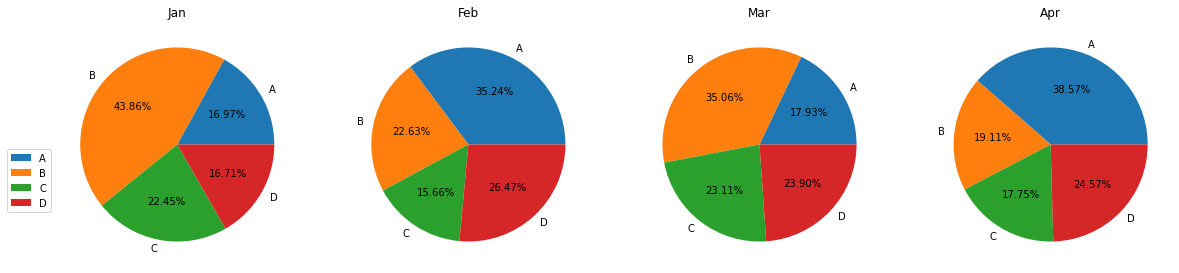

Table3  SOM, %                        
  Client Category     Jan     Feb     Mar     Apr
0               A  16.97%  35.24%  17.93%  38.57%
1               B  43.86%  22.63%  35.06%  19.11%
2               C  22.45%  15.66%  23.11%  17.75%
3               D  16.71%  26.47%  23.90%  24.57%

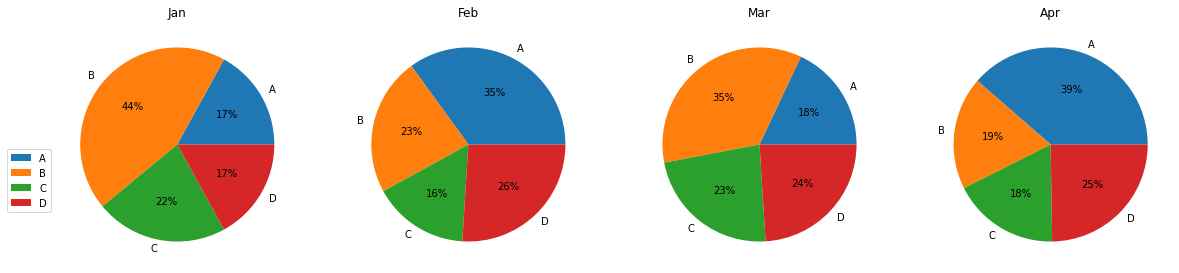

Table3 SOM, %               
  Client Category    Jan  Feb  Mar  Apr
0               A    17%  35%  18%  39%
1               B    44%  23%  35%  19%
2               C    22%  16%  23%  18%
3               D    17%  26%  24%  25%

In [154]:
from matplotlib import pyplot as plt
# Задание 3 создаю Pie Chart
# Создал ещё один DataFrame для того чтобы все значение имели тип int
# Создаю Pie Chart
# tablePlot = pd.DataFrame({'Jan':[janA,janB,janC,janD],
#                    'Feb':[febA,febB,febC,febD],
#                    'Mar':[marA,marB,marC,marD],
#                    'Apr':[aprA,aprB,aprC,aprD]}, index=['A Client Category','B Client Category',
#                                                         'C Client Category','D Client Category'])

tablePlot = pd.DataFrame({'A':[janA,febA,marA,aprA],
                         'B':[janB,febB,marB,aprB],
                   'C':[janC,febC,marC,aprC],
                   'D':[janD,febD,marD,aprD]}, index=['Jan','Feb',
                                                        'Mar','Apr'])

tablePlotInt = pd.DataFrame({'A':[janA1,febA1,marA1,aprA1],
                         'B':[janB1,febB1,marB1,aprB1],
                   'C':[janC1,febC1,marC1,aprC1],
                   'D':[janD1,febD1,marD1,aprD1]}, index=['Jan','Feb',
                                                        'Mar','Apr'])

tablePlotPercent = pd.DataFrame({'Jan':[janA+'%',janB+'%',janC+'%',janD+'%'],
                   'Feb':[febA+'%',febB+'%',febC+'%',febD+'%'],
                   'Mar':[marA+'%',marB+'%',marC+'%',marD+'%'],
                   'Apr':[aprA+'%',aprB+'%',aprC+'%',aprD+'%']}, index=['A Client Category','B Client Category',
                                                        'C Client Category','D Client Category'])

fig, axes = plt.subplots(1,4, figsize=(20,6))
for ax, idx in zip(axes, tablePlot.index):
    ax.pie(tablePlot.loc[idx], labels=tablePlot.columns, autopct='%1.2f%%')
    ax.set(ylabel='', title=idx, aspect='equal')

axes[0].legend(bbox_to_anchor=(0, 0.5))
plt.show()



tablePlotPer = [['A',janA+'%',febA+'%',marA+'%',aprA+'%'], 
              ['B',janB+'%',febB+'%',marB+'%',aprB+'%'], 
              ['C',janC+'%',febC+'%',marC+'%',aprC+'%'], 
              ['D',janD+'%',febD+'%',marD+'%',aprD+'%']]  
tablePlotPercent = pd.DataFrame(tablePlotPer,columns = ['Client Category','Jan','Feb','Mar','Apr'])
tablePlotPercent

display(table3Show)



fig, axes = plt.subplots(1,4, figsize=(20,6))
for ax, idx in zip(axes, tablePlotInt.index):
    ax.pie(tablePlotInt.loc[idx], labels=tablePlotInt.columns, autopct='%1.0f%%')
    ax.set(ylabel='', title=idx, aspect='equal')

axes[0].legend(bbox_to_anchor=(0, 0.5))
plt.show()
display(table3withDecShow)